# 房价预测

In [1]:
import pandas as pd
import numpy as np 

In [6]:
train = pd.read_csv('../data/house_price_predict/data.csv')#训练集的读取

In [7]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [8]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


SVM-是否容忍空值？--基于数值计算/数值回归--一定要将所有内容数字化--不支持

DecisionTree-是否容忍空值？--CART,（ID3,C4.5）-决策树的学习其实是对于空间的划分-decisionTree for Ranking-KDTree/BallTree

DNN-是否容忍空值？--基于数值计算

往往关于数据的填充和Outlier的处理是清洗的第一步

## 查看数据DataFrame的数据类型与空值的表现

In [ ]:
type(train)

In [ ]:
train.info()

数据类型一般分成两类：

Numerical-连续型数据->往往需要进行归一化

Categorial-离散型数据->往往需要进行LabelEncode-在使用中编码成数字

In [ ]:
train.get_dtype_counts()#得到列数据类型的统计

## 如何统计数据的缺失率？

In [ ]:
train.isnull()

1.哪些列有缺失？

2.缺失了多少？

3.缺失率是多少？

4.可否按照缺失率由大到小排列？

In [ ]:
nullRate=train.isnull().sum()

In [ ]:
[i/len(train) for i in nullRate]

In [ ]:
tmp=train.isnull().sum().sort_values()

In [ ]:
tmp[tmp>0]

cosx=A·B/|A||B|

## 一个算法的Baseline

算法的Pipeline:

数据采集->数据清洗->数据仓库->数据挖掘->数据标注->数据集市(训练集/评测集)->训练->评测->模型工程(Int8定点化)->模型的集成和应用

算法的BaseLine:

训练集的制作->训练->评测

在形成一个BaseLine之后，模型迭代的过程进步的标志是评测指标的提升

评测指标：

Regression

MSE(Mean Squared Error)-L2 / MAE(Mean Absolute Error)-L1

Classification

Cross-Entropy(交叉熵)

信息量 -log2(P)-> 信息熵 -$\Sigma$(p * log2(p)) ->交叉熵 -$\Sigma$(p * log2(q))

Center-Loss


## 数据列的简单填充

In [ ]:
train

In [ ]:
train1=train

In [ ]:
train1.head()

### 缺失值的类型

Numerical | Categorial

#### Numerical

1.均值填充

2.中位数填充

3.高频填充--高频会"稍微"少一些--连续型数据很难数字相等，但是很容易接近

4.分布拟合填充--回归一个分布，或者是 ($\mu$-均值 , $\sigma$-标准差)-(+-$\sigma$的范围中进行随机)

5.内在关系填充(根据列本身存在的意义和数据集内其他列的相关性进行构建数学映射模型进行填充)

#### Categorial

1.高频填充

"男"|"女"-->0|1

"小孩"|"青年"|"中年"|"老年"-->0|1|2|3

* No Free Lunch Theory-不存在超级机器学习模型

2.内在关系填充



In [ ]:
train1.mean()

In [ ]:
train1.median()

#### 对于连续性数据进行均值|中位数填充

In [ ]:
## 均值填充

train1=train1.fillna(train1.mean())#fillna函数会找到对应列的均值或者是中位数，对于该列进行相应的填充

In [ ]:
tmp=train1.isnull().sum()

In [ ]:
tmp[tmp>0].shape

#### 对于离散型数据进行填充

朴素的办法就是将NaN这种空类型变成'None'或者是'NA'的字段

In [ ]:
train1

In [ ]:
train1=train1.fillna('None')

In [ ]:
train1

In [ ]:
def getNullCount(t):
    tmp=t.isnull().sum()
    print(tmp[tmp>0])

In [ ]:
getNullCount(train1)

到目前为止，我们已经完成了“暴力”填充阶段

目前的训练集噪声很大,留给后面的EDA(Exploria Data Analysis)过程 

### 训练集的制作

In [ ]:
train1.head()

In [ ]:
y=train1['SalePrice']

In [ ]:
train1=train1.drop(['Id','SalePrice'],axis=1)

In [ ]:
train1.head()

In [ ]:
X=pd.get_dummies(train1)

In [ ]:
X.head()

In [79]:
from sklearn.model_selection import train_test_split

In [78]:
from sklearn.metrics import mean_squared_error

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123)

In [ ]:
X_train.shape

In [ ]:
X_test.shape

#### BaseLine模型的训练

In [ ]:
import xgboost as xgb

In [ ]:
xg_reg=xgb.XGBRegressor(objective='reg:linear',colsample_bytree=0.6,learning_rate=0.01,max_depth=5,alpha=10,n_estimators=3000,subsample=0.7,random_state=123)

In [ ]:
xg_reg.fit(X_train,y_train)

#### 进行模型评测

In [ ]:
pred=xg_reg.predict(X_test)

In [ ]:
#pred

In [ ]:
rmse=np.sqrt(mean_squared_error(y_test,pred))

In [ ]:
rmse

In [ ]:
logrmse=np.sqrt(mean_squared_error(np.log(y_test),np.log(pred)))

In [ ]:
logrmse

作业：

请大家使用中位数填充

调整超参，看看是否可以得到一个更好的模型

下次上课的时候请大家报出你们最好的模型的评测数据和超参

In [ ]:
pd.get_dummies(train1).shape

### GridSearch

In [ ]:
# gs=GridSearch(xg_reg,{
#     "n_estimators":[100,500,1000,3000],
#     "alpha":[0.01,0.1,1.0,10]
#     "lambda":[...]
# })

### Randomized Search

In [ ]:
# rs=RandomizedSearch(xg_reg,{
#     "n_estimators":[100,500,1000,3000],
#     "alpha":np.norm(1.0,0.7),
#     "lambda":[...]
# })

In [ ]:
train1.shape

In [ ]:
X_train.shape

In [ ]:
X_test.shape

## 交叉验证

1.数据有限->发挥数据本来的效率

2.数据的训练集和评测集的矛盾

    如果用更多的数据去训练，那么就会有更少的数据来评测->失去了对于真实泛化能力的考量
    
    如果用更少的数据来训练，很大可能造成欠拟合，在评测集上表现就一定不好
    
解决方法：

1.将数据集拆成K份->(首先进行shuffle)

2.规定k-1份进行训练，剩下的1份进行评测，总共训练k次，轮流每个子数据集作为评测集

    数据集被分成K份，1......K
    
    第一次训练使用第1份数据集作为评测集，剩余的k-1份作为训练集
    
    第i次训练使用第i份数据集作为评测集，剩余的k-1份作为训练集
    
    做k次训练
    
3.k次训练之后，评测的分值=k次评测结果的平均

4.不同的模型会提供不同的子模型的合并方法，会将所有的k个子模型进行合并


    

In [ ]:
params = {"objective":"reg:linear",'colsample_bytree': 0.7,'learning_rate': 0.1,'max_depth': 5, 'alpha': 10}

In [ ]:
matrix=xgb.DMatrix(data=X,label=y)#xgboost可以接受的Data的一种压缩后的数据结构,.lmdb/.h5,基于此可以对训练集的读写进行优化提升训练速度

In [ ]:
#X.shape

In [ ]:
#cv_results=xgb.cv(dtrain=matrix,params=params,nfold=10,num_boost_round=500,metrics='rmse',as_pandas=True,verbose=False)

#决策树的学习过程分为2个阶段，分裂和剪枝(前剪枝和后减枝)

In [ ]:
cv_results

## 数据的EDA入门

1.数据属性分布分析(概率密度分析/是否呈现正态分布)

2.数据属性与Target之间的相关性[correlation]

3.缺失属性相关性分析--进行合理的填充

4.构造属性和构造属性的相关性分析



In [ ]:
train.get_dtype_counts()

In [ ]:
#pd.get_dummies(train1,columns=['col_int64'])

In [ ]:
#pd.get_dummies(train1)#category and object 默认进行one_hot编码

In [ ]:
tmp=train.isnull().sum()

In [ ]:
tmp[tmp>0]

## 相关性分析

[-1 , +1]

|r|>0.95 显著关系 显著的关系需要概率该特征是否与目标有很强的关联关系(报价和成交价,这样的话可能考虑去掉，否则会影响判断的走向)

|r|>=0.8 强相关

|r|>=0.5 中度相关

0.5>=|r|>=0.3 弱相关 (待挖掘，可以尝试去掉)部分数据与该特征可能存在较强的相关性(楼房屋顶和顶楼的成交价的关系)

|r|<0.3 极弱相关



In [ ]:
train.corr()

In [ ]:
corr=train.corr()['SalePrice']

In [ ]:
corr[corr>0.5].sort_values()

In [ ]:
corr[corr<0]

In [ ]:
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt 

%matplotlib inline

In [ ]:
plt.figure(figsize=(30,30))
sns.heatmap(train.corr(),linewidths=0.01,square=True,cmap='viridis',annot=True)

### 要求：

安装matplotlib

安装seaborn

## 特征观察

观察特征与目标值之间的关系[使用统计图来进行观察]

In [ ]:
corr=train.corr()['SalePrice']
corr[corr>0.5].sort_values()

In [ ]:
train[['OverallQual','SalePrice']].groupby(['OverallQual']).mean().plot.bar()

In [ ]:
### 'GarageCars' 与 'SalePrice'之间的关系

In [ ]:
train[['GarageCars','SalePrice']].groupby(['GarageCars']).mean().plot.bar()

In [ ]:
#train[['GarageArea','SalePrice']].groupby(['GarageArea']).mean().plot.bar()

#不要将连续的数据进行groupby，这样做没有意义,如果想要对连续性的数据进行group，那么就需要对该数据进行分段

In [ ]:
train[['GarageCars','GarageArea']].groupby(['GarageCars']).mean().plot.bar()

In [ ]:
np.corrcoef(train['GarageCars'],train['GarageArea'])

### 正相关数据分析

这里我们分析一下正相关数据

OverallQual 装修质量

YearBuilt 建筑年代

YearRcemodAdd 重新改造时间(晚于或者等于建筑时间)

TotalBsmtSF 地下室的面积

1stFlrSF 1楼面积

GrLivArea 地上整体面积

FullBath 总体卫生间数量

TotRmsAbvGrd 总体卧室数量

GarageCars 车库容车量

GarageArea 车库面积

#### OverallQual 与 SalePrice的相关性分析

In [ ]:
sns.stripplot('OverallQual','SalePrice',data=train)

In [ ]:
sns.lmplot("OverallQual",'SalePrice',data=train)

In [ ]:
sns.swarmplot("OverallQual","SalePrice",data=train)

In [ ]:
sns.boxplot("OverallQual","SalePrice",data=train)

[作业：]请大家分析SalePrice 与 corr>0.5的变量的关系以及corr<0的变量之间的关系，请说明分析理由

In [ ]:
#scatter,jointplot

## 新一轮空值填充

In [9]:
x=train.isnull().sum()
x[x>0].sort_values().plot.bar(color='y')

### LotFrontage的填充

思路1:去不同的Neighborhood的均值和中位数

In [10]:
sns.violinplot(train['LotFrontage'],train['Neighborhood'])

NameError: name 'sns' is not defined

In [11]:
neighborhood_group=train.groupby('Neighborhood')
lot_medians=neighborhood_group['LotFrontage'].median()
lot_mean=neighborhood_group['LotFrontage'].mean()

In [12]:
lot_mean

Neighborhood
Blmngtn    47.142857
Blueste    24.000000
BrDale     21.562500
BrkSide    57.509804
ClearCr    83.461538
CollgCr    71.682540
Crawfor    71.804878
Edwards    68.217391
Gilbert    79.877551
IDOTRR     62.500000
MeadowV    27.800000
Mitchel    70.083333
NAmes      76.462366
NPkVill    32.285714
NWAmes     81.288889
NoRidge    91.878788
NridgHt    81.881579
OldTown    62.788991
SWISU      58.913043
Sawyer     74.437500
SawyerW    71.500000
Somerst    64.666667
StoneBr    62.700000
Timber     80.133333
Veenker    59.714286
Name: LotFrontage, dtype: float64

In [13]:
train[train['LotFrontage'].isnull()]['Neighborhood']

7        NWAmes
12       Sawyer
14        NAmes
16        NAmes
24       Sawyer
31       Sawyer
42      SawyerW
43      CollgCr
50      Gilbert
64      CollgCr
66        NAmes
76        NAmes
84      Gilbert
95      Gilbert
100      NWAmes
104      IDOTRR
111     Gilbert
113     Crawfor
116      Sawyer
120     ClearCr
126     NPkVill
131     Gilbert
133      Timber
136       NAmes
147     Gilbert
149     BrkSide
152      NWAmes
153     ClearCr
160     Veenker
166     ClearCr
         ...   
1300    Gilbert
1301    Crawfor
1309    SawyerW
1312    NoRidge
1318    CollgCr
1321    BrkSide
1342    CollgCr
1346     NWAmes
1348    SawyerW
1354    CollgCr
1356      NAmes
1357      NAmes
1358    Somerst
1362      NAmes
1365    Somerst
1368    CollgCr
1373    NoRidge
1381      NAmes
1383     Sawyer
1396     Timber
1407    Mitchel
1417    NoRidge
1419    Crawfor
1423    Edwards
1424      NAmes
1429     NWAmes
1431    NPkVill
1441    CollgCr
1443    BrkSide
1446    Mitchel
Name: Neighborhood, Leng

### 思路二:通过LotArea进行填充

In [14]:
train['LotFrontage'].corr(train['LotArea'])

0.42609501877180805

In [15]:
train['LotFrontage'].corr(np.sqrt(train['LotArea']))

0.6020022167939363

In [16]:
train['SqrtLotArea']=np.sqrt(train['LotArea'])

In [17]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SqrtLotArea
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,91.923882
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,97.979590
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,106.066017
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,97.724101
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,119.415242


In [18]:
sns.lmplot('SqrtLotArea','LotFrontage',data=train)

NameError: name 'sns' is not defined

In [19]:
sns.jointplot('SqrtLotArea','LotFrontage',data=train)

NameError: name 'sns' is not defined

In [20]:
filter=train['LotFrontage'].isnull()

In [21]:
train.LotFrontage[filter]=0.6*train.SqrtLotArea[filter]

c:\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [22]:
filter=train['LotFrontage'].isnull()
filter.sum()

0

在图像分类的过程中，比如说猫狗分类，我们分类的交叉熵可以定义成：

H(p,q)=-p_cat * log(q_cat)-p_dog * log(q_dog)

一张图片上面画了一只猫：

p_cat=1

p_dog=0

如果我的预测期：

q_cat=0.2

q_dog=0.8

H(p,q)=-1 * log(0.2)-0 * log(0.8)

=-1*log(0.2)=-log(0.2)=log(5)

对于分类模型的交叉熵=-log(q_label)-->分类的Loss函数

对于一张图片上画了一只猫的真实的熵本身是多少？

H(p,q)-H(p)=D(p||q)



## MasVnrType和MasVnrArea的填充

In [23]:
x=train.isnull().sum()
x[x>0]

Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [24]:
import matplotlib.pyplot as plt

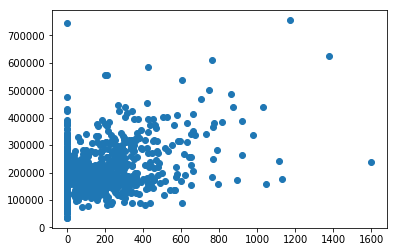

In [25]:
plt.scatter(train['MasVnrArea'],train['SalePrice'])

In [26]:
import seaborn as sns

c:\python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


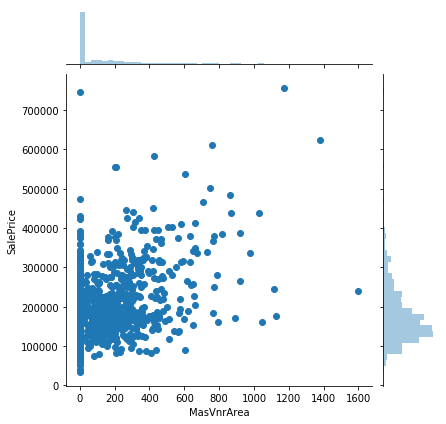

In [27]:
sns.jointplot(train['MasVnrArea'],train['SalePrice'])

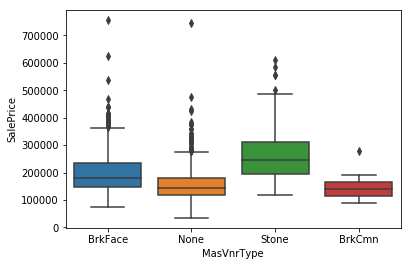

In [28]:
sns.boxplot('MasVnrType','SalePrice',data=train)

In [29]:
train.groupby(['MasVnrType']).count()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SqrtLotArea
MasVnrType,,,,,,,,,,,,,,,,,,,,,
BrkCmn,15,15,15,15,15,15,0,15,15,15,...,0,7,2,15,15,15,15,15,15,15
BrkFace,445,445,445,445,445,445,10,445,445,445,...,2,80,11,445,445,445,445,445,445,445
None,864,864,864,864,864,864,77,864,864,864,...,4,188,40,864,864,864,864,864,864,864
Stone,128,128,128,128,128,128,3,128,128,128,...,1,6,1,128,128,128,128,128,128,128


In [30]:
train[train.MasVnrType=='None'][['MasVnrType','MasVnrArea']]

,MasVnrType,MasVnrArea
1,None,0.0
3,None,0.0
5,None,0.0
8,None,0.0
9,None,0.0
10,None,0.0
12,None,0.0
15,None,0.0
17,None,0.0
18,None,0.0


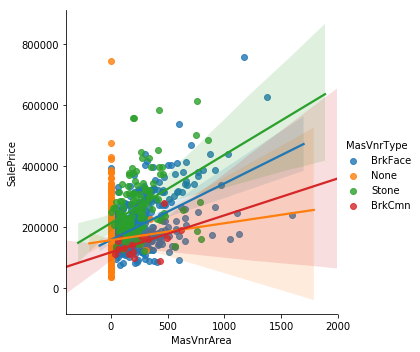

In [31]:
sns.lmplot('MasVnrArea','SalePrice',hue='MasVnrType',data=train)

In [32]:
filter=train['MasVnrArea'].isnull()

In [33]:
train.MasVnrArea[filter]=0.0

c:\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [34]:
filter=train['MasVnrType'].isnull()
train.MasVnrType[filter]='None'

c:\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


后续在EDA的特征工程中，可以使用如下填充办法：

1.分类进行预测MasVnrType，使用回归来回归MasVnrArea


In [35]:
def getnullcount():
    x=train.isnull().sum()
    print(x[x>0])
    x[x>0].sort_values().plot.bar()

Alley           1369
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


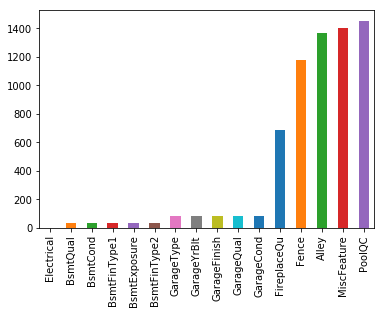

In [36]:
getnullcount()

### 3. Electrical的填充

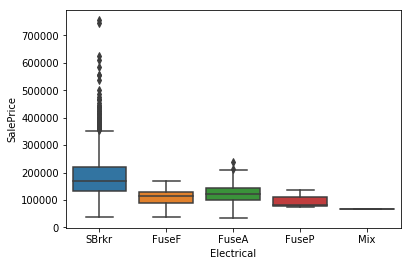

In [37]:
sns.boxplot('Electrical','SalePrice',data=train)

In [38]:
train.groupby(['Electrical']).count()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SqrtLotArea
Electrical,,,,,,,,,,,,,,,,,,,,,
FuseA,94,94,94,94,94,94,12,94,94,94,...,0,23,2,94,94,94,94,94,94,94
FuseF,27,27,27,27,27,27,4,27,27,27,...,0,2,0,27,27,27,27,27,27,27
FuseP,3,3,3,3,3,3,2,3,3,3,...,0,0,0,3,3,3,3,3,3,3
Mix,1,1,1,1,1,1,0,1,1,1,...,0,0,0,1,1,1,1,1,1,1
SBrkr,1334,1334,1334,1334,1334,1334,73,1334,1334,1334,...,7,256,52,1334,1334,1334,1334,1334,1334,1334


In [39]:
filter=train['Electrical'].isnull()
train['Electrical'][filter]='SBrkr'

c:\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Alley           1369
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


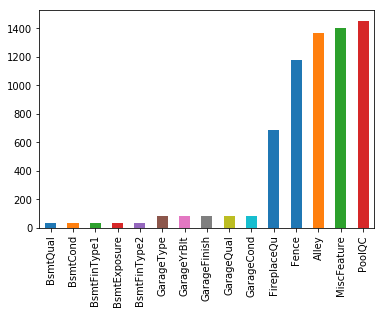

In [40]:
getnullcount()

### Alley填充

EDA后半段考虑删掉该列

In [41]:
train['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

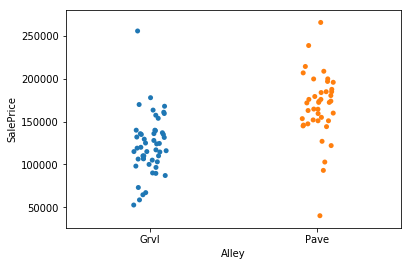

In [42]:
sns.stripplot(x=train['Alley'],y=train['SalePrice'],jitter=True)

In [43]:
train['Alley']=train['Alley'].fillna('None')

BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


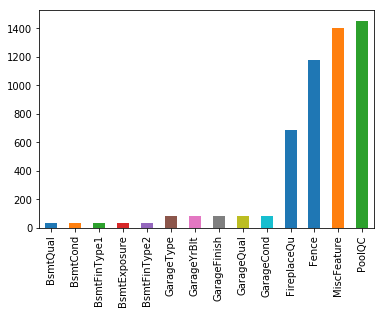

In [44]:
getnullcount()

### BaseMent群填充

TotalBsmt是一个完整的关于Basement的列，可以拿出来进行与SalePrice相关性分析

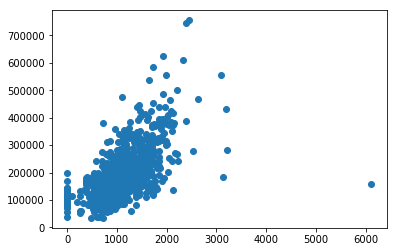

In [45]:
plt.scatter(train['TotalBsmtSF'],train['SalePrice'])

In [46]:
basement_cols=['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtFinSF1','BsmtFinSF2']

In [47]:
print(train[basement_cols+['TotalBsmtSF']][train['BsmtQual'].isnull()==True])

     BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2  BsmtFinSF1  \
17        NaN      NaN          NaN          NaN          NaN           0   
39        NaN      NaN          NaN          NaN          NaN           0   
90        NaN      NaN          NaN          NaN          NaN           0   
102       NaN      NaN          NaN          NaN          NaN           0   
156       NaN      NaN          NaN          NaN          NaN           0   
182       NaN      NaN          NaN          NaN          NaN           0   
259       NaN      NaN          NaN          NaN          NaN           0   
342       NaN      NaN          NaN          NaN          NaN           0   
362       NaN      NaN          NaN          NaN          NaN           0   
371       NaN      NaN          NaN          NaN          NaN           0   
392       NaN      NaN          NaN          NaN          NaN           0   
520       NaN      NaN          NaN          NaN          NaN           0   

In [48]:
train[train.BsmtCond=='NA']

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SqrtLotArea


In [49]:
for col in basement_cols:
    if 'FinSF' not in col:
        train[col]=train[col].fillna('None')

FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


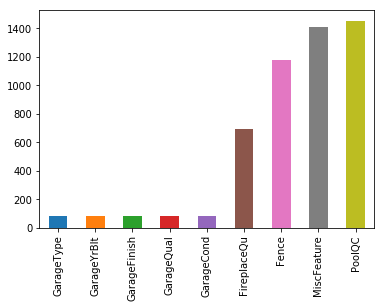

In [50]:
getnullcount()

### FirePlace填充

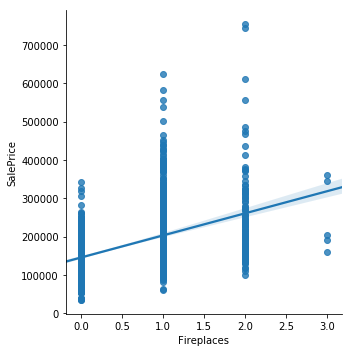

In [51]:
sns.lmplot('Fireplaces','SalePrice',data=train)

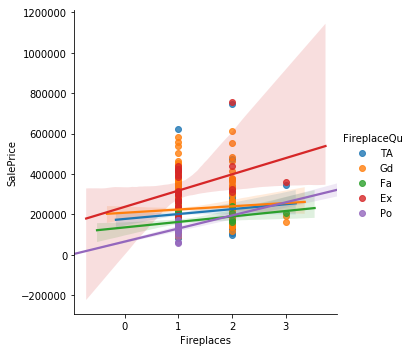

In [52]:
sns.lmplot('Fireplaces','SalePrice',data=train,hue='FireplaceQu')

In [53]:
train['FireplaceQu']=train['FireplaceQu'].fillna('None')

GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


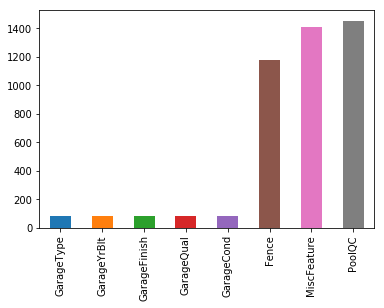

In [54]:
getnullcount()

### Garage列群填充

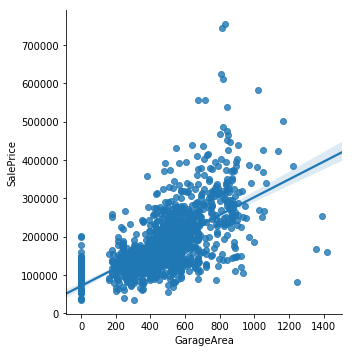

In [55]:
sns.lmplot('GarageArea','SalePrice',data=train)

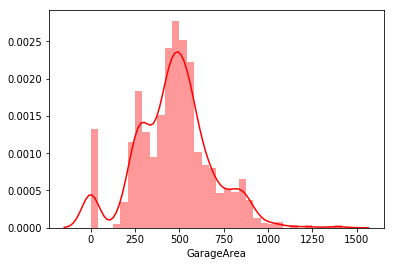

In [56]:
sns.distplot(train['GarageArea'],color='r',kde=True)

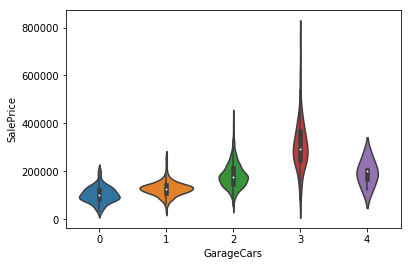

In [57]:
sns.violinplot(train['GarageCars'],train['SalePrice'])

In [58]:
garage_cols=['GarageType','GarageQual','GarageCond','GarageYrBlt','GarageFinish','GarageCars','GarageArea']

In [59]:
train[garage_cols][train['GarageType'].isnull()]

,GarageType,GarageQual,GarageCond,GarageYrBlt,GarageFinish,GarageCars,GarageArea
39,NaN,NaN,NaN,NaN,NaN,0,0
48,NaN,NaN,NaN,NaN,NaN,0,0
78,NaN,NaN,NaN,NaN,NaN,0,0
88,NaN,NaN,NaN,NaN,NaN,0,0
89,NaN,NaN,NaN,NaN,NaN,0,0
99,NaN,NaN,NaN,NaN,NaN,0,0
108,NaN,NaN,NaN,NaN,NaN,0,0
125,NaN,NaN,NaN,NaN,NaN,0,0
127,NaN,NaN,NaN,NaN,NaN,0,0
140,NaN,NaN,NaN,NaN,NaN,0,0


In [60]:
for col in garage_cols:
    if train[col].dtype==np.object:
        train[col]=train[col].fillna('None')
    else:
        train[col]=train[col].fillna(0)

PoolQC         1453
Fence          1179
MiscFeature    1406
dtype: int64


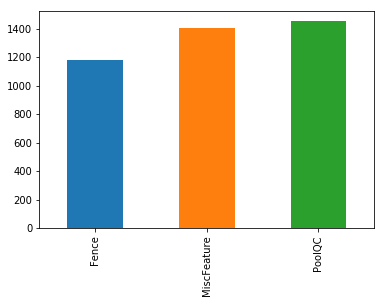

In [61]:
getnullcount()

### PoolQC填充

In [62]:
train.filter(like='Pool',axis=1)

,PoolArea,PoolQC
0,0,NaN
1,0,NaN
2,0,NaN
3,0,NaN
4,0,NaN
5,0,NaN
6,0,NaN
7,0,NaN
8,0,NaN
9,0,NaN


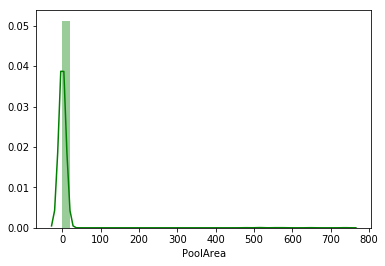

In [63]:
sns.distplot(train['PoolArea'],color='g',kde=True)

In [64]:
train.PoolQC=train.PoolQC.fillna('None')

Fence          1179
MiscFeature    1406
dtype: int64


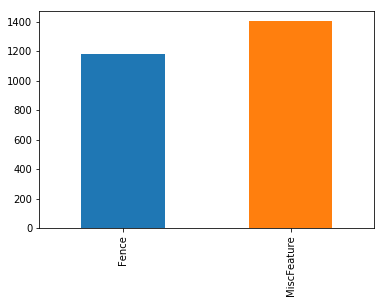

In [65]:
getnullcount()

### Fence填充

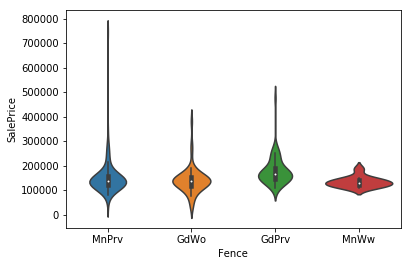

In [66]:
sns.violinplot(train['Fence'],train['SalePrice'])

因为总共有5个类型，然而可以统计出来的类型一共只有4类，因此，可以断定最后一个类NA用空值代替了 

In [67]:
train['Fence']=train['Fence'].fillna('None')

回看填充后的数据与SalePrice的关系

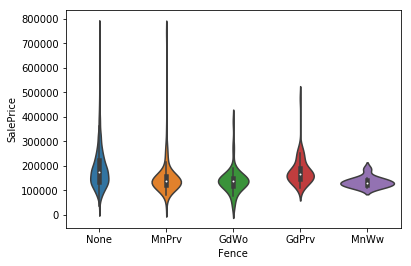

In [68]:
sns.violinplot(train['Fence'],train['SalePrice'])

### MiscFeature 填充

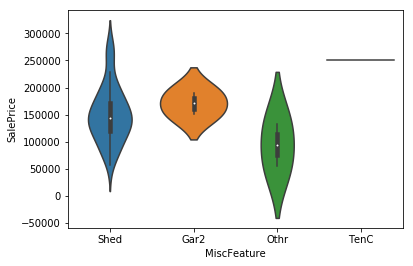

In [69]:
sns.violinplot(train['MiscFeature'],train['SalePrice'])

因为MiscFeature本来有5类，然而只统计出4类，因此可以断定第五类NA其实是空值代表的

In [70]:
train['MiscFeature']=train['MiscFeature'].fillna('None')

In [71]:
#getnullcount()

In [72]:
train.to_csv('./data/train_1.csv')

FileNotFoundError: [Errno 2] No such file or directory: './data/train_1.csv'

## 机器学习部分

需要考虑各种单独的模型的各自表现后，筛选出表现较好的模型，并进行集成学习

1.线性回归类模型

    1.1朴素线性回归
    
    1.2基于L1的线性回归
    
    1.3基于L2的线性回归
    
    1.4ElasticNet
    
2.树回归-CART

    2.1CART
    
    2.2RF
    
    2.3AdaBoost
    
    2.4GBDT--XGBoost--lightGBM
    
3.SVM类型

    3.1SVR
    
* 4.神经网络

    4.1FC神经网络
    

5.集成学习

    5.1 Stacking Ensemble

### 数据集的准备

In [ ]:
train=pd.read_csv('./data/train_1.csv')

In [73]:
y=train['SalePrice']

In [74]:
train1=train.drop(['Id','SalePrice'],axis=1)

In [75]:
X=pd.get_dummies(train1).reset_index(drop=True)

In [76]:
X['Unnamed: 0']

KeyError: 'Unnamed: 0'

In [80]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123)

In [ ]:
#X_train

### 基础线性回归

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [82]:
lm=LinearRegression()

In [83]:
p=lm.fit(X_train,y_train)

In [84]:
pred=lm.predict(X_test)

In [85]:
np.sqrt(mean_squared_error(np.log(y_test),np.log(pred)))

0.12627809622157146

In [86]:
np.sqrt(mean_squared_error(y_test,pred))

24973.913406558273

In [87]:
def benchmark(model):
    pred=model.predict(X_test)
    logrmse=np.sqrt(mean_squared_error(np.log(y_test),np.log(pred)))
    return logrmse

In [88]:
benchmark(lm)

0.12627809622157146

#### 预处理 Preprocessing

In [89]:
from sklearn.pipeline import make_pipeline

In [90]:
from sklearn.preprocessing import RobustScaler

In [91]:
lm_model=make_pipeline(RobustScaler(),LinearRegression())

In [92]:
lm_model.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [93]:
benchmark(lm_model)

c:\python37\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

### RidgeRegression

In [ ]:
from sklearn.linear_model import Ridge

#### 朴素的Ridge回归

In [ ]:
ridge_model=Ridge(alpha=0.1)

In [ ]:
ridge_model.fit(X_train,y_train)

In [ ]:
benchmark(ridge_model)

#### 带有RobustScaler的回归

In [ ]:
ridge_model_pipe=make_pipeline(RobustScaler(),Ridge(alpha=0.1))

In [ ]:
ridge_model_pipe.fit(X_train,y_train)

In [ ]:
benchmark(ridge_model_pipe)

#### 带有CV的回归

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
kfolds=KFold(n_splits=10,shuffle=True,random_state=123)

In [ ]:
from sklearn.linear_model import RidgeCV

In [ ]:
r_alphas=[0.01,0.1,1,3,5,7,10,100]

In [ ]:
ridge_model_cv=make_pipeline(RobustScaler(),RidgeCV(alphas=r_alphas,cv=kfolds))

In [ ]:
ridge_model_cv.fit(X_train,y_train)

In [ ]:
benchmark(ridge_model_cv)

In [ ]:
def benchmark1(model,testset,label):
    pred=model.predict(testset)
    if pred[pred<0].shape[0]>0:
        print('Neg Value')
    rmse=np.sqrt(mean_squared_error(label,pred))
    lrmse=np.sqrt(mean_squared_error(np.log(label),np.log(pred)))

    print('RMSE:',rmse)
    print('LRMSE:',lrmse)
    return lrmse

In [ ]:
benchmark1(ridge_model_cv,X_test,y_test)

In [ ]:
r_alphas=[.0001, .0003, .0005, .0007, .0009, 
          .01, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 20, 30, 50, 60, 70, 80]

In [ ]:
def ridge_train_test(alpha):
    m=make_pipeline(RobustScaler(),RidgeCV(alphas=[alpha],cv=kfolds))
    m.fit(X_train,y_train)
    return benchmark1(m,X_test,y_test)

In [ ]:
scores=[]
for k in r_alphas:
    scores.append(ridge_train_test(k))

In [ ]:
plt.plot(r_alphas,scores)